In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

Dictionary-like object（继承于字典 Dict）, the interesting attributes are:

‘data’, the data to learn,
‘target’, the classification labels,
‘target_names’, the meaning of the labels,
‘feature_names’（不是所有的类都有，load_digits() 就没有）, the meaning of the features, and
‘DESCR’, the full description of the dataset.

In [29]:
boston = datasets.load_boston()
import pandas as pd
df = pd.DataFrame(boston.data)
target = pd.DataFrame(boston.target)
print(boston.feature_names)
#0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.980.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [23]:
target.to_csv('boston.target')

MSE: 6.8016


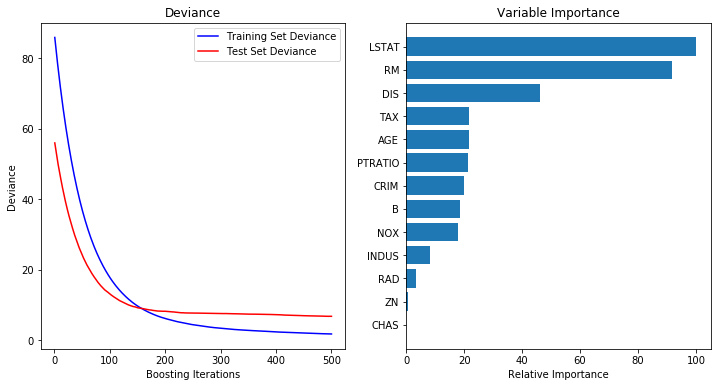

In [8]:



X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train) #训练
mse = mean_squared_error(y_test, clf.predict(X_test)) #预测并且计算MSE
#print 2.7和3.0版本有区别
print("MSE: %.4f" %(mse))

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64) #矩阵转化

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

#Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

- CRIM     per capita crime rate by town 
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS    proportion of non-retail business acres per town 
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX      nitric oxides concentration (parts per 10 million) 
- RM       average number of rooms per dwelling 
- AGE      proportion of owner-occupied units built prior to 1940 
- DIS      weighted distances to five Boston employment centres 
- RAD      index of accessibility to radial highways 
- TAX      full-value property-tax rate per $10,000 
- PTRATIO  pupil-teacher ratio by town 
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT    % lower status of the population 
- MEDV     Median value of owner-occupied homes in $1000's

http://blog.csdn.net/everlasting_188/article/details/60870653

'CRIM'	'ZN'	'INDUS'	'CHAS'	'NOX'	'RM'	'AGE'	'DIS'	'RAD'	'TAX'	'PTRATIO'	'B'	'LSTAT'
0.00632	18	2.31	0	0.538	6.575	65.2	4.09	1	296	15.3	396.9	4.98
												
CRIM     per capita crime rate by town 												
ZN       proportion of residential land zoned for lots over 25,000 sq.ft. 												
INDUS    proportion of non-retail business acres per town 												
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 												
NOX      nitric oxides concentration (parts per 10 million) 												
RM       average number of rooms per dwelling 												
AGE      proportion of owner-occupied units built prior to 1940 												
DIS      weighted distances to five Boston employment centres 												
RAD      index of accessibility to radial highways 												
TAX      full-value property-tax rate per $10,000 												
PTRATIO  pupil-teacher ratio by town 												
B        1000(Bk 0.63)^2 where Bk is the proportion of blacks by town 												
LSTAT    % lower status of the population 												
MEDV     Median value of owner-occupied homes in $1000's												
